# Import Libraries

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Create and Visualize Dataset

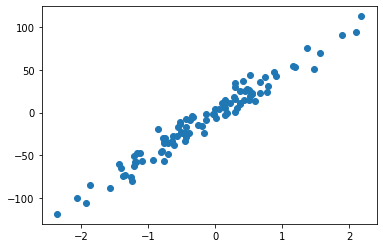

In [3]:
x,y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [5]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [6]:
# reshape y to be 100x1
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


In [8]:
# matrix X with biais column
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [11]:
theta = np.random.randn(2, 1)
theta

array([[0.34526789],
       [2.23829764]])

# Modele

In [13]:
def model(X, theta):
    return X.dot(theta)

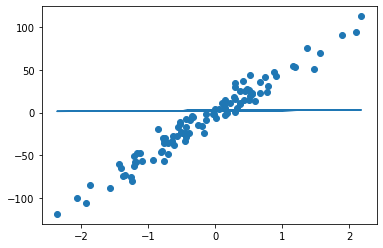

In [16]:
F = model(X, theta)
plt.scatter(x,y)
plt.plot(x, F)

# Cost Function

In [17]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) -y)**2)

In [18]:
cost_function(X, y ,theta)

1019.5247719603428

# Gradient Descent

In [23]:
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [32]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Training

In [33]:
final_theta,cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [30]:
final_theta

array([[48.62919103],
       [-0.79714777]])

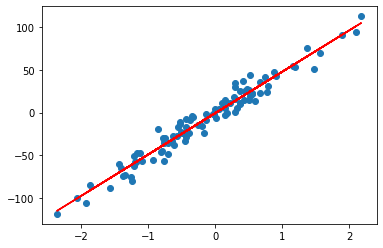

In [31]:
predictions = model(X, final_theta)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# Learning Curve

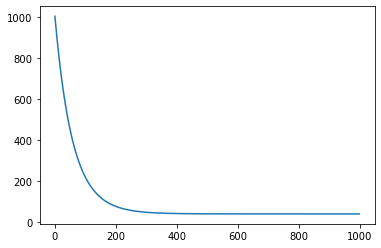

In [34]:
plt.plot(range(1000), cost_history)

# Determination Coefficient

In [35]:
def determination_coeff(y, predictions):
    u = ((y - predictions)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [36]:
determination_coeff(y, predictions)

0.9579644040981592